<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Акопян Изабелла Арменовна
##### Группа:   НБИбд-01-20

## Москва 2023
***

### Вариант №12

#### __Текст задания__:
В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.

2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

3. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества  R2  двух подходов.

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).

6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:

линейной регрессии
гребневой регрессии (L2)
лассо регрессии (L1)
7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.


------------------------
Лабораторная работа 1 – Вариант 12 

1. Набор данных: wine_quality 

2. Независимая переменная: features/density 

3. Зависимая переменная: features/fixed acidity 

4. Визуализация для независимой переменной – эмпирическая плотность распределения 

5. Визуализация для зависимой переменной – столбчатая диаграмма 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

Решение ниже


__Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные.__

In [2]:
import tensorflow_datasets as tfds

In [74]:
ds = tfds.load("wine_quality", split='train') 

ds

<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [4]:
df = tfds.as_dataframe(ds)
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [5]:
#df.drop(columns=['quality'],inplace=True) #оценка качества может быть от 0 до 10 всего
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


__Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.__

In [6]:
corr_matrix = df.corr()
corr_matrix

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
features/alcohol,1.000000,-0.360189,-0.075729,-0.780138,-0.120881,-0.250104,0.121432,-0.450631,-0.017433,-0.448892,0.067718,0.435575
features/chlorides,-0.360189,1.000000,0.114364,0.257211,0.023086,0.101392,-0.090439,0.088685,0.016763,0.198910,0.070512,-0.209934
features/citric acid,-0.075729,0.114364,1.000000,0.149503,0.289181,0.094077,-0.163748,0.094212,0.062331,0.121131,-0.149472,-0.009209
features/density,-0.780138,0.257211,0.149503,1.000000,0.265331,0.294210,-0.093592,0.838967,0.074493,0.529881,0.027114,-0.307123
features/fixed acidity,-0.120881,0.023086,0.289181,0.265331,1.000000,-0.049396,-0.425858,0.089021,-0.017143,0.091070,-0.022697,-0.113663
features/free sulfur dioxide,-0.250104,0.101392,0.094077,0.294210,-0.049396,1.000000,-0.000618,0.299098,0.059217,0.615501,-0.097012,0.008158
features/pH,0.121432,-0.090439,-0.163748,-0.093592,-0.425858,-0.000618,1.000000,-0.194133,0.155951,0.002321,-0.031915,0.099427
features/residual sugar,-0.450631,0.088685,0.094212,0.838967,0.089021,0.299098,-0.194133,1.000000,-0.026664,0.401439,0.064286,-0.097577
features/sulphates,-0.017433,0.016763,0.062331,0.074493,-0.017143,0.059217,0.155951,-0.026664,1.000000,0.134562,-0.035728,0.053678
features/total sulfur dioxide,-0.448892,0.198910,0.121131,0.529881,0.091070,0.615501,0.002321,0.401439,0.134562,1.000000,0.089261,-0.174737


In [8]:
import seaborn as sns

<Axes: >

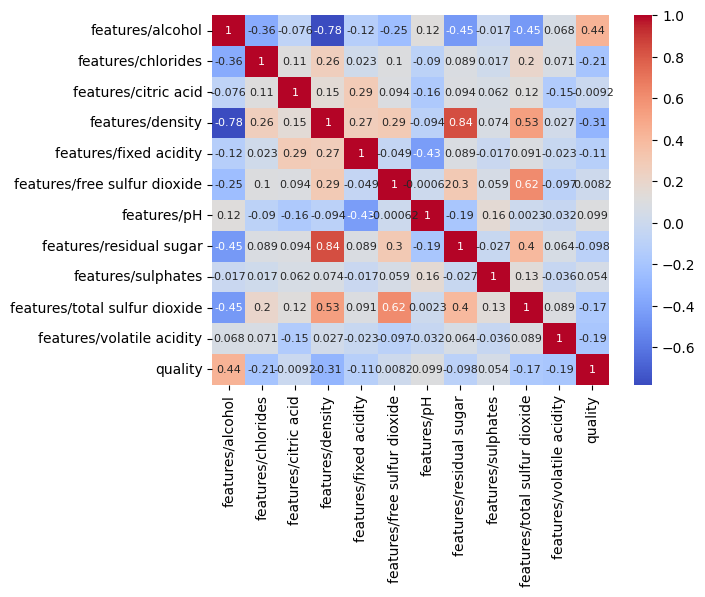

In [9]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size':8}) #для визуализации, так проще


Видим, тут плотность зависит от спирта (чем больше спирта, тем меньше плотность (-0.78)) - по чеддоку корреляция высокая

А диоксид серы (sulfur acidity) можно считать не зависит от меры кислотности (pH) - по Чеддоку вообще нет корреляции

__Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.__

In [10]:
import matplotlib.pyplot as plt

y = features/fixed acidity 

x = features/density 

Визуализация для независимой переменной – эмпирическая плотность распределения 

Визуализация для зависимой переменной – столбчатая диаграмма 

__Эмпирическая (выборочная) плотность распределения (PDF) для x__

# __границы х отредачить*__:

In [44]:
y = df['features/fixed acidity']
x = df['features/density']

<Axes: ylabel='Frequency'>

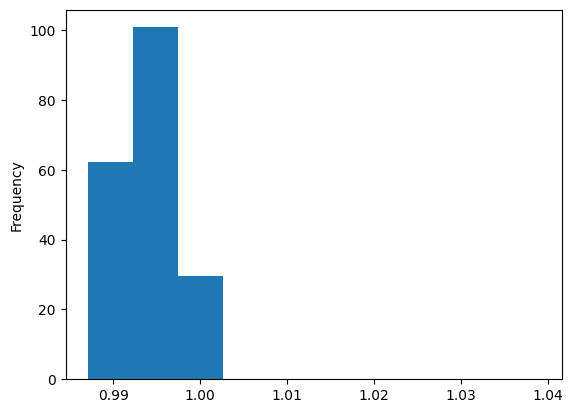

In [32]:
df['features/density'].plot.hist( density=True )


<Axes: ylabel='Frequency'>

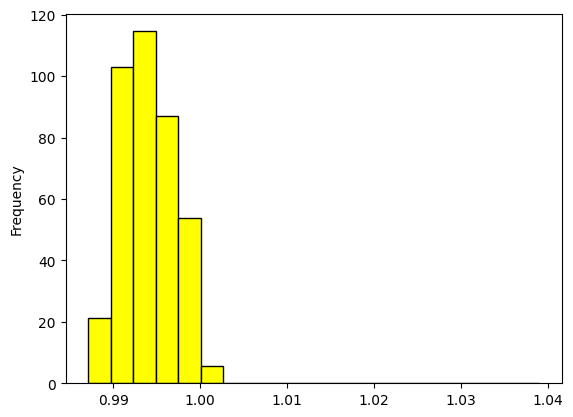

In [37]:
df['features/density'].plot.hist(color='yellow', edgecolor='black', bins=20, density=True, )

__Столбчатая диаграмма для y__

<Axes: title={'center': 'Столбчатая диаграмма признака features/fixed acidity'}>

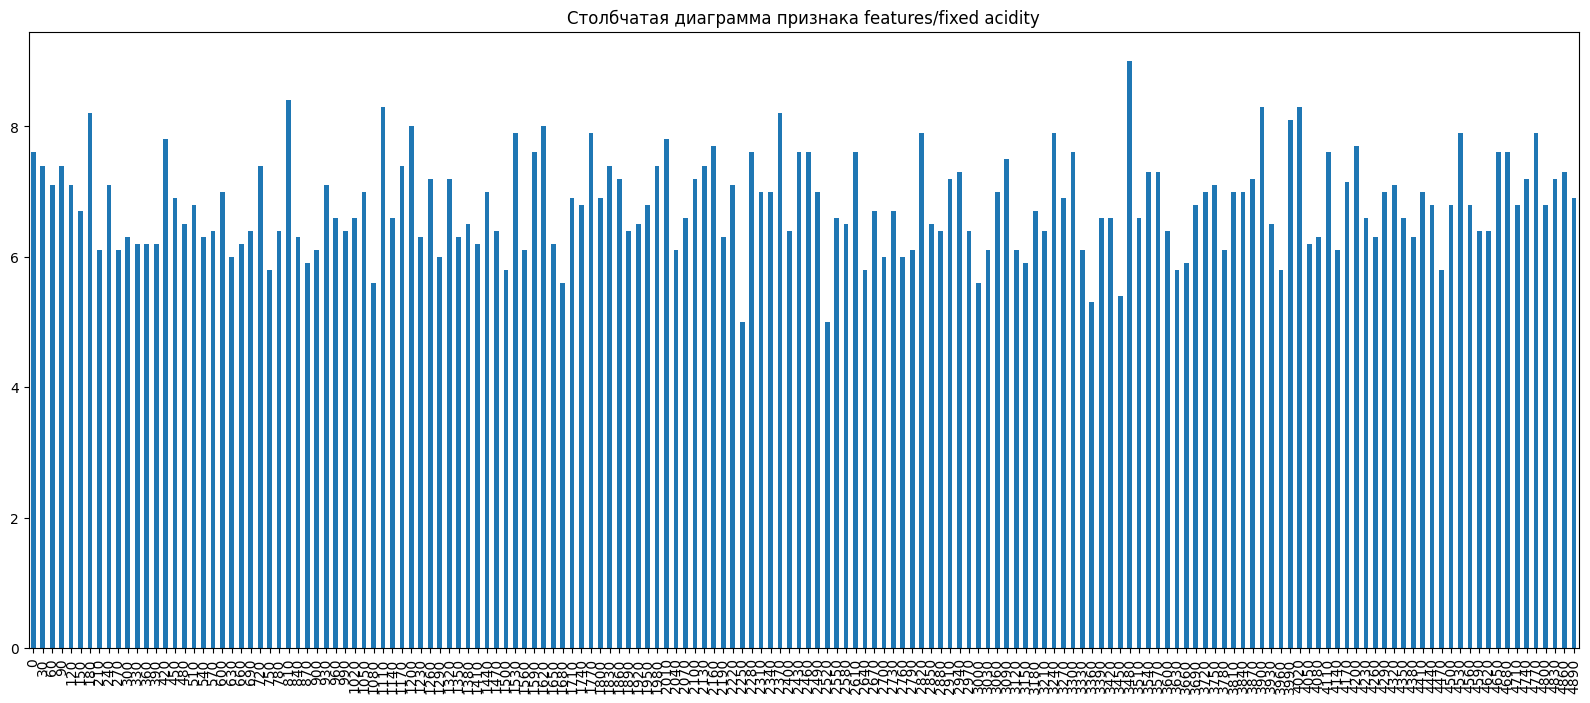

In [38]:
df[::30]['features/fixed acidity'].plot.bar(title='Столбчатая диаграмма признака features/fixed acidity', figsize=(20,8))

__Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества R2 двух подходов.__

__Показатель качества регрессии – R^2 (коэффициент детерминации)__

In [76]:
import numpy as np
import pandas as pd

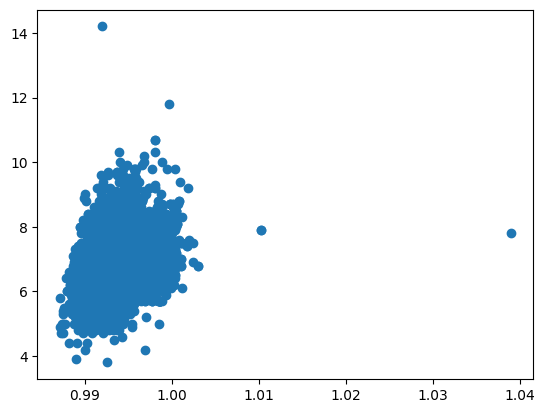

In [60]:
plt.scatter(x, y)


In [54]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [56]:
#коэффициент регрессии
a = (x - x_mean).dot(y - y_mean) / (x - x_mean).dot(x - x_mean)
#коэффициент смещения
b = y_mean - a * x_mean

In [57]:
y_hat = a * x + b
y_hat

0       7.361801
1       6.635643
2       6.610191
3       7.056366
4       6.565269
          ...   
4893    6.596718
4894    6.909630
4895    7.216568
4896    7.522751
4897    6.593719
Name: features/density, Length: 4898, dtype: float32

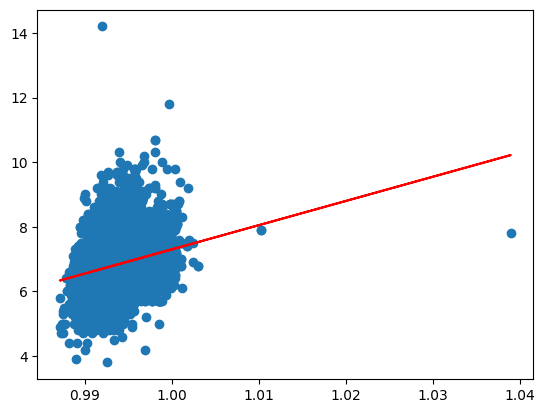

In [59]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')


In [61]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

381.6103820800781

In [62]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [63]:
reg1 = SimpleLinReg()
reg1

SimpleLinearReg()

In [64]:
reg1.fit(x, y)
reg1.predict(np.array([x_predict]))

array([381.61038208])

In [65]:
reg1.a_, reg1.b_

(74.861694, -67.559784)

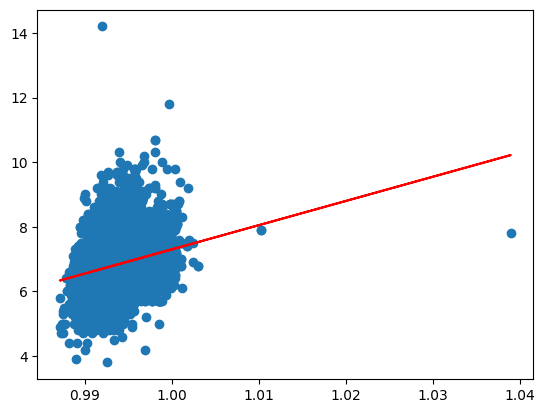

In [67]:
y_hat1 = reg1.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')


In [ ]:
тут  поделю датасет на тест и обучение

In [77]:
df_train = pd.DataFrame(x_train)
df_train

NameError: ignored

In [78]:
x = x_train[:,5]  # можно 12
y = y_train
x.shape, y.shape

NameError: ignored

In [ ]:
plt.scatter(x, y);
#набор переменных для парной регрессии

при помощи нейронной сети:

In [39]:
import tensorflow as tf

In [40]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['RootMeanSquaredError']
)
#R2

In [49]:
model.fit(x, y, epochs=100) # verbose=0

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 0.6541 - root_mean_squared_error: 0.8598
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6617 - root_mean_squared_error: 0.8640
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6496 - root_mean_squared_error: 0.8552
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6543 - root_mean_squared_error: 0.8579
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6517 - root_mean_squared_error: 0.8569
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6578 - root_mean_squared_error: 0.8655
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6644 - root_mean_squared_error: 0.8679
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6523 - root_mean_squared_error: 0.8551
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - los

Выполним прогнозирование значений зависимой переменной (отклика)

In [50]:
y_predict2 = model.predict(x_test[:,5])
y_predict2[:5]

NameError: ignored

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.scatter(x_test[:,5], y_test, c='c')
plt.plot(x_test[:,5], y_predict, c='m', label='точная линия регрессии')
plt.plot(x_test[:,5], y_predict2, c='r', label='линия регрессии (ANN)')
plt.legend();

1 - mse_test/np.var(y_test)
коэффициент детерминации, по нему сравню модели